In [1]:
require(tidyverse)
require(data.table)


Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.1  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose



In [33]:
require(ggrepel)

Loading required package: ggrepel


In [2]:
PCs_f <- 'Biomarkers_snpnet_PRSs.PCs.tsv.gz'


In [102]:
Sigma_f <- 'Biomarkers_snpnet_PRSs.Sigma.tsv.gz'
V_f <- 'Biomarkers_snpnet_PRSs.V.tsv.gz'
U_f <- 'Biomarkers_snpnet_PRSs.U.tsv.gz'
cos_sim_f <- 'Biomarkers_snpnet_PRSs.cos_sim.tsv.gz'

In [4]:
PCs_df <- fread(
    cmd=paste0('zcat ', PCs_f, ' | sed -e"s/^\t/IID\t/g"'), 
    sep='\t', data.table=F
)

In [26]:
V_df <- fread(
    cmd=paste0('zcat ', V_f, ' | sed -e"s/^\t/GBE_ID\t/g"'), 
    sep='\t', data.table=F
)


In [103]:
cos_sim_df <- fread(
    cmd=paste0('zcat ', cos_sim_f, ' | sed -e"s/^\t/GBE_ID\t/g"'), 
    sep='\t', data.table=F
)


In [10]:
PCs_df %>%
column_to_rownames('IID') %>% head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
1000028,-1.45603260,-1.3940624,-1.7939317,0.5100105,1.2717852,1.5852202,0.6634741,-1.19389482,-0.5214173,1.11066600,1.6358927,-0.1811138,-0.5295987,1.39756849,-1.33156876,-0.2970382,-1.0874074,-2.1126809,-0.8197390,0.07663937
1000034,0.80761634,0.3351752,1.1953549,-0.8999438,-2.0471745,-0.7726821,-0.5755962,1.58498611,-1.7558934,2.14930066,0.2305092,0.6948390,1.1375932,-0.98715811,0.04646172,1.3880842,1.3366270,0.2105658,-1.3806732,-1.00140309
1000045,3.62393081,-1.4838985,0.5041062,-1.5523489,-0.1437791,1.0124206,-0.0748337,-0.24176716,-0.4222804,0.26176351,0.7848141,-0.9780319,1.8617478,0.07549038,1.49970537,0.1885973,0.3557360,-0.4145218,-1.3537529,1.08068368
1000052,0.06050292,-0.4640618,3.6151816,-0.4827424,0.6964361,0.2190427,-0.5049479,-0.04755985,1.0767502,0.45609099,-1.3581224,1.1543135,-0.9066514,-0.58420231,-0.95960260,0.6721734,1.2834610,-1.5954337,-0.2878327,1.66603708
1000076,1.33483684,-0.3069998,1.1635786,-0.5593934,-0.4184664,-2.4808368,-0.3836534,-0.60578207,0.1164894,0.08336913,0.3631572,0.9386335,0.7457266,1.32680331,0.57692958,-1.0544883,1.3049331,0.8979984,-2.4858427,0.67351724
1000087,-0.27083362,-1.0193905,0.9366093,1.5610952,-0.4489376,0.6714498,0.1480331,1.42851465,0.5528976,-0.47092833,-0.2814134,0.2951119,1.2216222,-1.15952238,-1.86161519,1.5276790,0.8104796,0.4948110,-0.5413306,1.19538458


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


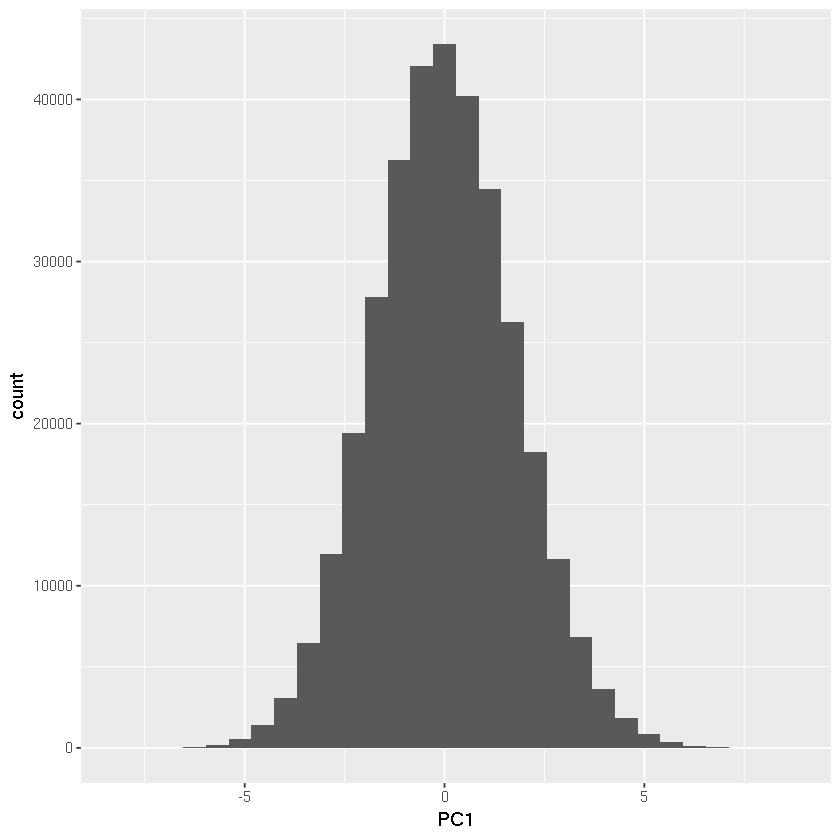

In [6]:
PCs_df %>% 
ggplot(aes(x=PC1)) +
geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


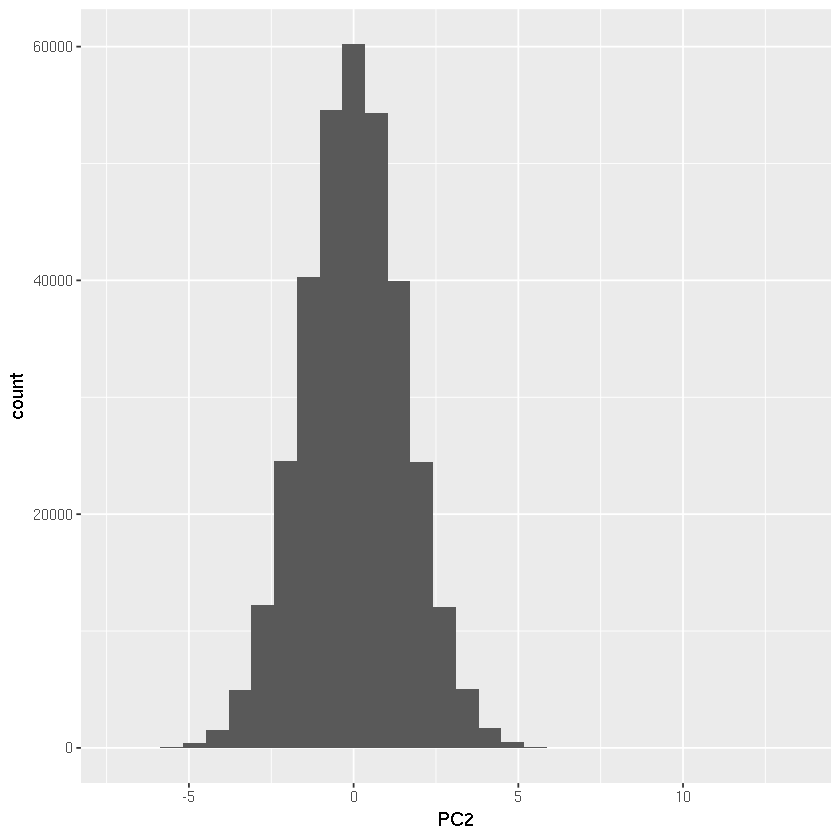

In [7]:
PCs_df %>% 
ggplot(aes(x=PC2)) +
geom_histogram()

In [9]:
PCs_df %>% head(30) %>% mutate(
    r2 = PC1 ** 2 + PC2 ** 2,
    r = sqrt(r2)
) %>%
select(PC1, PC2, r, r2)

PC1,PC2,r,r2
-1.45603260,-1.3940624,2.0157978,4.0634410
0.80761634,0.3351752,0.8744064,0.7645866
3.62393081,-1.4838985,3.9159710,15.3348292
0.06050292,-0.4640618,0.4679893,0.2190140
1.33483684,-0.3069998,1.3696855,1.8760383
-0.27083362,-1.0193905,1.0547549,1.1125079
2.34876816,1.9635490,3.0614108,9.3722363
-2.10212446,-2.0949761,2.9678026,8.8078522
0.59378327,1.7466073,1.8447807,3.4032158
0.23548467,-2.1404590,2.1533736,4.6370178


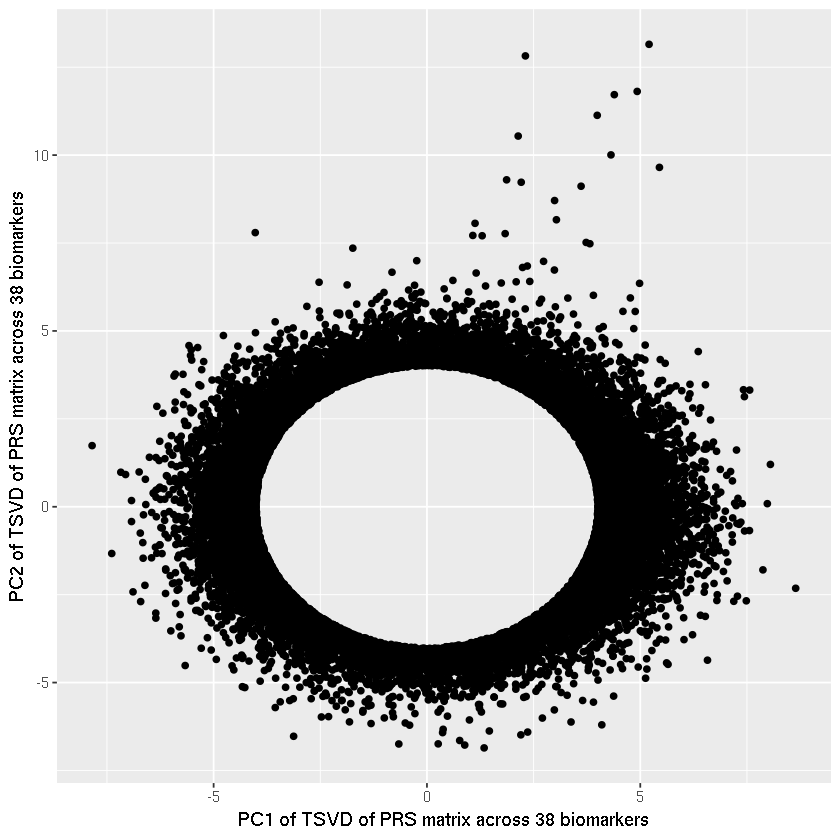

In [41]:
PCs_df %>% mutate(
    r2 = PC1 ** 2 + PC2 ** 2,
    r = sqrt(r2)
) %>%
filter(
    r > 4,
) %>%
ggplot(aes(x=PC1, y=PC2)) +
geom_point() +
labs(
    x = 'PC1 of TSVD of PRS matrix across 38 biomarkers',
    y = 'PC2 of TSVD of PRS matrix across 38 biomarkers'
) 

In [19]:
ggsave('outliers.png')

Saving 6.67 x 6.67 in image


In [53]:
V_df %>%
mutate(PC1 = PC1 * arrow_mult_factor, PC2 = PC2 * arrow_mult_factor) %>%
head()

GBE_ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,⋯,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
BIN10030500,-0.277901756,-0.07838058,-0.077706159,-0.004747253,0.034275643,-0.057389055,0.079192615,0.025345348,0.28874087,⋯,0.522391235,-0.15154809,-0.04831860,0.00538100,-0.05130127,0.06359313,0.01575871,-0.01529736,0.0196592746,-0.008785281
BIN10030510,-0.379964715,-0.05099094,-0.080570065,-0.009014550,0.052100271,-0.060804045,0.070283471,0.001901418,0.22411508,⋯,0.540319961,-0.18327703,-0.06462732,0.04551354,-0.01236207,0.05511310,0.01363541,0.01010462,-0.0000361357,0.063896945
BIN10030800,0.257297150,-0.25838031,0.040488746,0.007288959,0.024421215,0.211753189,-0.061574317,0.076806099,0.09421781,⋯,-0.002442694,-0.08979204,-0.02869923,0.09446858,0.37560675,-0.34535333,-0.23048249,0.71218767,0.0134852580,-0.254375448
BIN10030820,0.147765792,0.38565947,0.032799716,-0.010836098,-0.077257521,-0.058993047,-0.064050952,0.154370827,-0.07470130,⋯,-0.076304371,-0.19414154,-0.13359996,0.23270594,-0.24445665,0.52531796,-0.37046440,0.36448483,0.2227530040,0.379532630
INI10030500,0.002076509,0.05244147,-0.010512128,-0.003627627,-0.005847426,0.001653404,0.007096435,-0.020793340,0.01850060,⋯,-0.011650772,0.01978547,0.05211681,-0.18640465,0.73616679,0.62330237,0.13961638,-0.02964000,-0.0343393474,-0.037183345
INI10030510,0.077754395,1.17594946,0.001175519,0.011440088,-0.042172263,0.021782261,0.212774411,-0.093471851,0.45102332,⋯,-0.210801806,0.19516672,0.08689955,-0.01088562,-0.09237630,0.04658811,0.04112644,0.12369232,0.0090260461,0.170836941


In [129]:
gbe_names_df <- fread(
    cmd=paste0('cat ', 'GBE_names.tsv', ' | sed -e "s/^#//g"'), sep='\t', data.table=F, stringsAsFactors=F
) %>%
mutate(
    GBE_short_short_name = GBE_short_name,
    GBE_short_short_name = str_replace_all(GBE_short_short_name, 'covariate and statin adjusted', ''),
    GBE_short_short_name = str_replace_all(GBE_short_short_name, 'covariate adjusted', '')
)


In [130]:
gbe_names_df %>% head()

GBE_category,GBE_ID,GBE_N,GBE_NAME,GBE_short_name,GBE_short_name_len,GBE_short_short_name
BIN,BIN10030500,23590,Microalbumin_higher_than_40_mg/L,Microalbumin > 40 mg/L,22,Microalbumin > 40 mg/L
BIN,BIN10030510,14248,UACR_higher_than_30_mg/g,UACR > 30 mg/g,14,UACR > 30 mg/g
BIN,BIN10030800,38696,Oestradiol_higher_than_212_pmol/L,Oestradiol > 212 pmol/L,23,Oestradiol > 212 pmol/L
BIN,BIN10030820,16700,Rheumatoid_factor_higher_than_16_IU/mL,Rheumatoid factor > 16 IU/mL,28,Rheumatoid factor > 16 IU/mL
BIN,BIN1020483,2433,Ever_attempted_suicide_missing_is_control,Ever attempted suicide missing is control,41,Ever attempted suicide missing is control
BIN,BIN1210,119602,Snoring,Snoring,7,Snoring


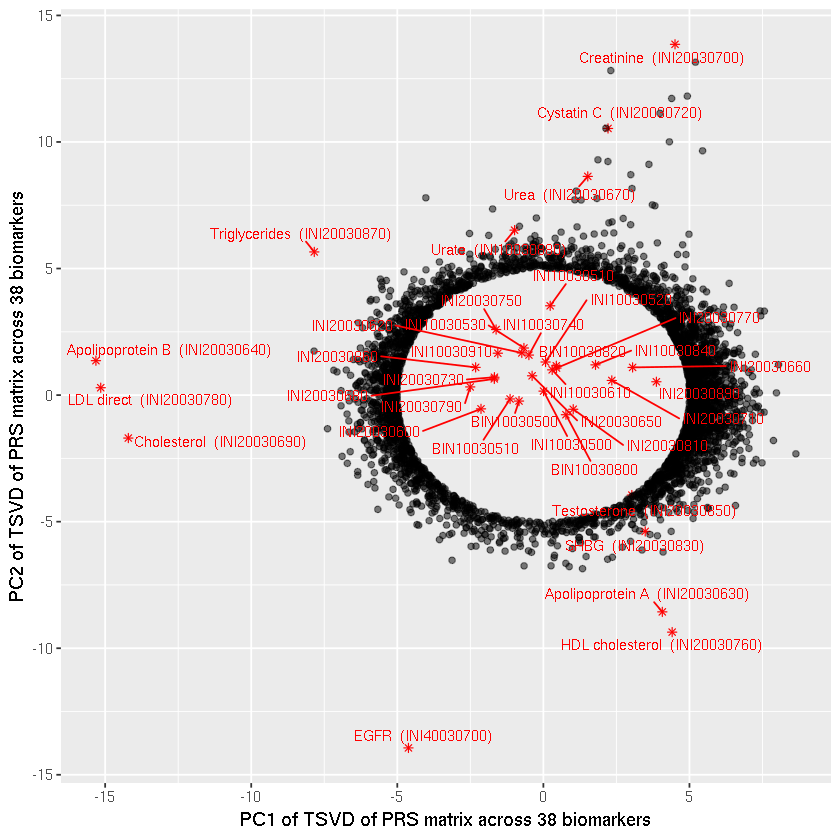

In [164]:
arrow_mult_factor <- 30
V_df %>% 
mutate(PC1 = PC1 * arrow_mult_factor, PC2 = PC2 * arrow_mult_factor) %>%
left_join(
    gbe_names_df %>% select(GBE_ID, GBE_short_short_name),
    by='GBE_ID'
) %>% 
mutate(
    label = if_else(
        PC1 ** 2 + PC2 **2 > 16, 
        paste0(GBE_short_short_name, ' (', GBE_ID, ')'),
        GBE_ID
    )
) %>%
ggplot(aes(x=PC1, y=PC2, label=label)) +
geom_point(color='red', shape=8) +
geom_point(
    data = PCs_df %>% mutate(r2 = PC1 ** 2 + PC2 ** 2, r = sqrt(r2)) %>% filter(r > 5) %>% 
    mutate(IID == '') %>% rename(label = IID),
    aes(x=PC1, y=PC2), alpha=.5
) +
labs(
    x = 'PC1 of TSVD of PRS matrix across 38 biomarkers',
    y = 'PC2 of TSVD of PRS matrix across 38 biomarkers'
) +
geom_text_repel(
#     ylim  = c(5, NA),
#     angle = 90,
    size=3,
    force = 5,
    color='red'
)

In [165]:
ggsave('biplot.png')

Saving 6.67 x 6.67 in image


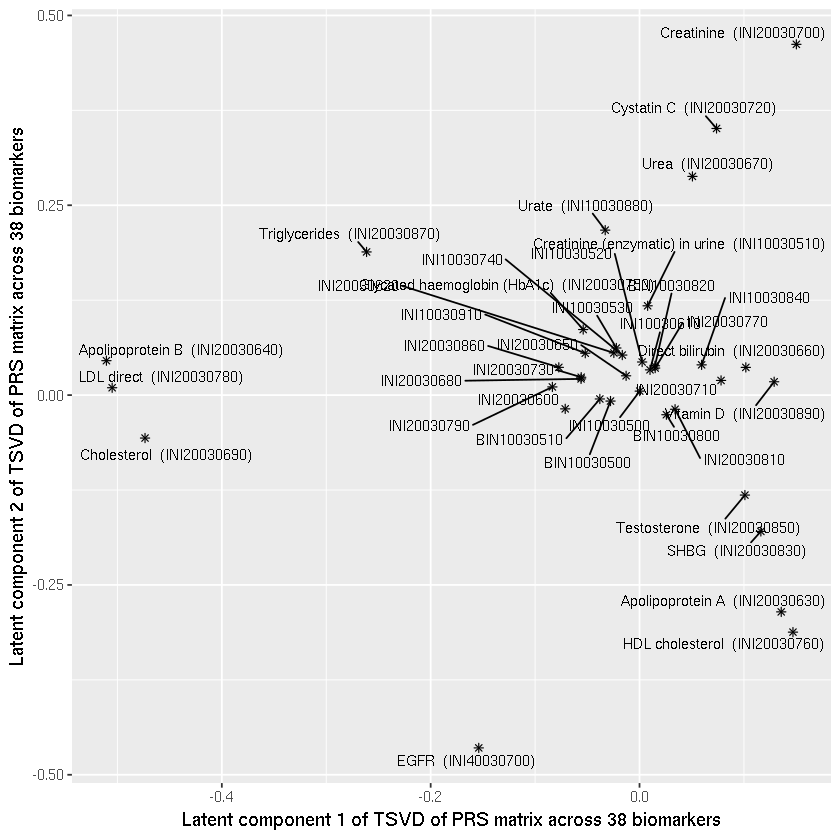

In [166]:
V_df %>% 
left_join(
    gbe_names_df %>% select(GBE_ID, GBE_short_short_name), 
    by='GBE_ID'
) %>% 
mutate(
    label = if_else(
        PC1 ** 2 + PC2 **2 > .01, 
        paste0(GBE_short_short_name, ' (', GBE_ID, ')'),
        GBE_ID
    )
) %>%
ggplot(aes(x=PC1, y=PC2, label=label)) +
geom_point(shape=8) +
labs(
    x = 'Latent component 1 of TSVD of PRS matrix across 38 biomarkers',
    y = 'Latent component 2 of TSVD of PRS matrix across 38 biomarkers'
) +
geom_text_repel(
#     ylim  = c(5, NA),
#      angle = 45,
    size=3,
    force = 10,
#     color='red'
)

In [167]:
ggsave('phenotype_singular_vectors.png')

Saving 6.67 x 6.67 in image


In [105]:
get_hclust_order_from_mat <- function(mat){
    mat_hclust <- (mat %>% dist() %>% hclust())
    sort_order <- mat_hclust$order
    keys <- mat %>% select(key) %>% pull()
    data.frame(
        key = keys[sort_order],
        order = 1:length(keys)
    )    
}

generate_heatmap <- function(
    df, max_value = 1,
    axis_text_x_size = 8,
    axis_text_y_size = 8,
    x_axis_color='#666666',
    y_axis_color='#666666',    
    xlab='Phenotype',
    ylab='Phenotype',
    sizelab = 'cosine similarity',    
    legend_color_title = 'cosine similarity'
){
    if( ! 'x_color' %in% colnames(df) ) df$x_color = x_axis_color
    if( ! 'y_color' %in% colnames(df) ) df$y_color = y_axis_color
    
    y_order<- df %>% 
    rename(key = y_col) %>%
    dcast(key ~ x_col, mean, value.var = 'value_col', fill=0) %>%
    get_hclust_order_from_mat() %>%
    rename(y_col = key, y_order = order) %>%
    left_join(df %>% select(y_col, y_color) %>% unique(), by='y_col') %>%
    replace_na(list(y_color = y_axis_color))
    
    x_order<- df %>% 
    rename(key = x_col) %>%    
    dcast(key ~ y_col, mean, value.var = 'value_col', fill=0) %>%
    get_hclust_order_from_mat() %>%
    rename(x_col = key, x_order = order) %>%
    left_join(df %>% select(x_col, x_color) %>% unique(), by='x_col') %>%
    replace_na(list(x_color = x_axis_color))
    
    df_plot <- df %>%
    inner_join(x_order, by='x_col') %>% 
    inner_join(y_order, by='y_col') %>%
    mutate(
        value_col = if_else(value_col >  max_value,  max_value, value_col),
        value_col = if_else(value_col < -max_value, -max_value, value_col)
    ) 
    
    df_plot %>%    
    ggplot(aes(
        y = reorder(y_label, y_order), 
        x = reorder(x_label, x_order), 
        color = value_col, 
        size  = size_col
    )) + 
    geom_point() + 
    theme_classic() + 
    theme(
        panel.background = element_rect(
            fill = "grey79", 
            colour = "grey79", 
            size = 0.5, 
            linetype = "solid"
        ),
        panel.grid.major = element_line(colour="white", size=0.5),
        axis.text.x = element_text(
            size=axis_text_x_size, 
            color=x_order%>%arrange(x_order)%>%select(x_color)%>%pull(),
            angle = 90, hjust = 1, vjust=.4
        ),
        axis.text.y = element_text(
            size=axis_text_y_size, 
            color=y_order%>%arrange(y_order)%>%select(y_color)%>%pull(),
        ),
        legend.position="bottom"
    ) + 
    scale_color_gradient2(
        name=legend_color_title, low="turquoise4", mid="white", high="orangered1") +
    guides(
        size=guide_legend(override.aes=list(colour="turquoise4"))
    ) +    
    labs(
        y = ylab,
        x = xlab,
        size=sizelab
    ) + guides(
        color = guide_colourbar(order = 1),
        size = guide_legend(order = 2, ncol = 3)
    )
}

In [143]:
cos_sim_long_df <- cos_sim_df %>% 
left_join(
    gbe_names_df %>% select(GBE_ID, GBE_short_short_name), 
    by='GBE_ID'
) %>% 
rename(
    GBE_name_2 = GBE_short_short_name,
    GBE_ID_2 = GBE_ID
) %>% 
gather('GBE_ID', 'cos_sim', -GBE_name_2, -GBE_ID_2) %>%
left_join(
    gbe_names_df %>% select(GBE_ID, GBE_short_short_name), 
    by='GBE_ID'
) %>% 
rename(
    GBE_name_1 = GBE_short_short_name,
    GBE_ID_1 = GBE_ID
) %>%
select(GBE_ID_1, GBE_name_1, GBE_ID_2, GBE_name_2, cos_sim)


In [145]:
cos_sim_long_df %>% head()

GBE_ID_1,GBE_name_1,GBE_ID_2,GBE_name_2,cos_sim
BIN10030500,Microalbumin > 40 mg/L,BIN10030500,Microalbumin > 40 mg/L,1.00000000
BIN10030500,Microalbumin > 40 mg/L,BIN10030510,UACR > 30 mg/g,0.98366573
BIN10030500,Microalbumin > 40 mg/L,BIN10030800,Oestradiol > 212 pmol/L,-0.01582352
BIN10030500,Microalbumin > 40 mg/L,BIN10030820,Rheumatoid factor > 16 IU/mL,-0.02124124
BIN10030500,Microalbumin > 40 mg/L,INI10030500,Microalbumin in urine,-0.00788145
BIN10030500,Microalbumin > 40 mg/L,INI10030510,Creatinine (enzymatic) in urine,0.04526208


Warning message in dist(.):
“NAs introduced by coercion”Warning message:
“Column `y_col` joining factor and character vector, coercing into character vector”Warning message in dist(.):
“NAs introduced by coercion”Warning message:
“Column `x_col` joining factor and character vector, coercing into character vector”

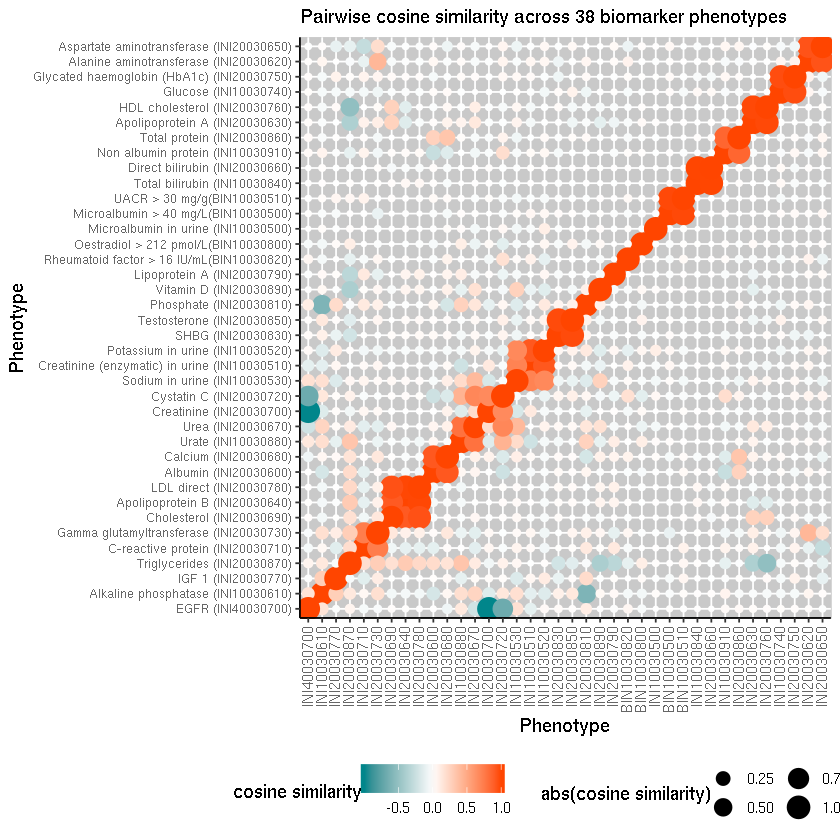

In [174]:
cos_sim_long_df %>% 
# filter(GBE_ID_1 != GBE_ID_2) %>%
mutate(
    value_col = cos_sim,    
    size_col = abs(cos_sim),    
    x_col = GBE_ID_1, 
    y_col = GBE_ID_2,
    x_label = GBE_ID_1,
    y_label = paste0(GBE_name_2, '(', GBE_ID_2, ')')
) %>% 
generate_heatmap(
    sizelab = 'abs(cosine similarity)',
    axis_text_x_size = 8,
    axis_text_y_size = 7    
) + labs(
    title='Pairwise cosine similarity across 38 biomarker phenotypes'
)

In [175]:
ggsave('cosine_similarity_of_PRS_predictions.png')

Saving 6.67 x 6.67 in image


In [160]:
cos_sim_long_df %>% 
filter(
    GBE_ID_1 != GBE_ID_2,
     desc(GBE_ID_1) < desc(GBE_ID_2),
    abs(cos_sim) > .5
) %>%
arrange(-abs(cos_sim))

GBE_ID_1,GBE_name_1,GBE_ID_2,GBE_name_2,cos_sim
INI40030700,EGFR,INI20030700,Creatinine,-0.9993997
INI20030660,Direct bilirubin,INI10030840,Total bilirubin,0.9976730
INI20030780,LDL direct,INI20030640,Apolipoprotein B,0.9907584
INI20030760,HDL cholesterol,INI20030630,Apolipoprotein A,0.9856629
BIN10030510,UACR > 30 mg/g,BIN10030500,Microalbumin > 40 mg/L,0.9836657
INI20030850,Testosterone,INI20030830,SHBG,0.9784645
INI20030750,Glycated haemoglobin (HbA1c),INI10030740,Glucose,0.9693004
INI20030780,LDL direct,INI20030690,Cholesterol,0.9538878
INI20030650,Aspartate aminotransferase,INI20030620,Alanine aminotransferase,0.9442203
INI10030520,Potassium in urine,INI10030510,Creatinine (enzymatic) in urine,0.9243070


In [162]:
snpnet_model_dir <- '~/repos/rivas-lab/PRS/private_output/snpnet_biomarker_PRS/biomarkers_20190407/3_snpnet/'
snpnet_models <- list()

In [163]:
PCs_df %>% mutate(
    r2 = PC1 ** 2 + PC2 ** 2,
    r = sqrt(r2)
) %>%
arrange(-r) %>%
head(10)

IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,⋯,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,r2,r
1214791,5.206023,13.150692,9.220269,-0.2839084,0.7915349,-1.2994405,-0.49163520,0.3822937,-1.5034501,⋯,0.1073594,0.6693631,0.03594318,1.6108889,3.14948172,0.1852172,-1.3958601,1.27975378,200.04338,14.143669
2050260,2.307640,12.820829,8.067071,-0.8251093,0.5667323,-3.2695116,-0.92635446,-1.8274024,-2.0541799,⋯,0.5709658,-0.5458292,-0.71632798,0.2594548,-0.01562115,-0.2404572,-2.5801696,1.53263772,169.69885,13.026851
4938075,4.927620,11.810869,4.324224,2.3671473,3.8684969,1.0481440,0.29427345,-0.6763104,1.5211420,⋯,-1.1648184,-0.4473416,-0.82022478,-1.8759409,1.51600369,-1.6044177,-3.1521312,0.19975901,163.77807,12.797581
3113231,4.391520,11.718749,6.523973,0.5310582,3.0851469,-0.9522126,0.03828897,0.2476627,-0.4802725,⋯,0.8662837,-1.8852236,0.60120756,0.6345058,0.89001580,0.1354989,-1.0917806,0.76734739,156.61453,12.514573
1261578,3.991127,11.131260,5.703867,2.3982632,2.4079231,0.5864169,-1.49488492,0.6522692,-0.8324873,⋯,0.5846997,-0.9338175,-0.18693742,-0.6273613,2.61053237,1.5927497,-1.2594922,1.06775608,139.83405,11.825145
4382643,5.449129,9.650875,6.033980,-0.4533811,-0.9887836,-1.1194159,0.48617447,2.5431132,-1.3722776,⋯,-3.7551534,-1.3302937,2.45462367,-1.0830987,0.08227040,-0.7157301,-0.7211891,-0.07963905,122.83240,11.082978
5461095,4.313504,10.006113,4.655766,2.9807270,1.9635552,0.4800011,-1.59314287,0.2388513,-0.8131816,⋯,-1.2428827,-2.1490305,0.22541813,-1.1701502,1.76021291,0.8211704,0.8123263,0.67033323,118.72863,10.896267
5786259,2.138672,10.541545,4.276219,1.1287982,-0.2555477,0.4416876,0.18299208,1.3737450,-0.1430358,⋯,0.7616632,0.2478048,-3.11060740,1.2310828,-0.79327735,1.8703739,-0.7435102,-0.24870652,115.69809,10.756305
3318081,3.612755,9.115105,5.179521,-1.0819674,1.8674959,-0.1257856,1.22955571,1.6274157,-1.2026315,⋯,-0.5727657,1.5686326,0.28829603,-0.2734663,2.30541621,1.3385545,-0.3197077,1.98859752,96.13714,9.804955
3541542,2.209528,9.228089,4.260772,2.9831383,1.5413780,1.3785150,0.20256444,1.7189554,1.3235503,⋯,-0.7818094,-2.6751387,-0.20323668,-0.7276294,0.60351891,-0.8147166,-0.8993274,1.10916222,90.03965,9.488923
